In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
data = pd.read_csv('forbes_new.csv')
data.head()

,Rank,Name,Country,Sales,Profit,Assets,MV,Industry,Founded,Employees,Company age,World
0,1,Berkshire Hathaway,United States,276090.0,89800.0,958780.0,741480.0,Diversified Financials,1939,372000.0,84,North America
1,3,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,400380.0,105360.0,576040.0,2292080.0,Oil & Gas Operations,1933,68493.0,90,Asia
2,4,JPMorgan Chase,United States,124540.0,42120.0,3954690.0,374450.0,Banking,2000,270000.0,23,North America
3,6,Amazon,United States,469820.0,33360.0,420550.0,1468400.0,E-Commerce,1994,1608000.0,29,North America
4,7,Apple,United States,378700.0,100560.0,381190.0,2640320.0,Electronics,1976,164000.0,47,North America


Закодируем категориальные признаки, возьмем признаки Индустрии и части света, потому что они несут большую информативность

In [4]:
X_dum_industry = pd.get_dummies(data['Industry'], drop_first=True)
X_dum_world = pd.get_dummies(data['World'], drop_first=True)

In [6]:
data_enc = pd.concat([data[['Sales', 'Profit', 'Assets', 'MV',  'Company age']], X_dum_industry, X_dum_world], axis = 1) 
data_enc.head() #наш сет для обучения состоит из таких признаков: Выручка, Прибыль, Активы, Возраст компании, закодированные Часть света и Индустрия

,Sales,Profit,Assets,MV,Company age,Airlines,Alcoholic Beverages,Appliances,Auto Brands,Auto Repair & Maintenance,...,Transportation,Transportation & Logistics,Travel & Leisure,Utilities,Video Games,Asia,Australia,Europe,North America,South America
0,276090.0,89800.0,958780.0,741480.0,84,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,400380.0,105360.0,576040.0,2292080.0,90,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,124540.0,42120.0,3954690.0,374450.0,23,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,469820.0,33360.0,420550.0,1468400.0,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,378700.0,100560.0,381190.0,2640320.0,47,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:


# делим в пропорции 80 к 20
data_train, data_test = train_test_split(data_enc, test_size = 0.2, random_state=42)

In [8]:
data_train.head()

,Sales,Profit,Assets,MV,Company age,Airlines,Alcoholic Beverages,Appliances,Auto Brands,Auto Repair & Maintenance,...,Transportation,Transportation & Logistics,Travel & Leisure,Utilities,Video Games,Asia,Australia,Europe,North America,South America
705,12890.0,-394.8,392650.0,12090.0,98,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
963,15430.0,218.7,38840.0,58050.0,28,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
599,11830.0,1880.0,29960.0,16040.0,19,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
411,13670.0,1350.0,63120.0,34180.0,200,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
710,7910.0,2000.0,10040.0,42060.0,113,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [9]:
y_train = data_train['MV']
y_test = data_test['MV']

X_train = data_train.drop('MV', axis=1)
X_test = data_test.drop('MV', axis=1)

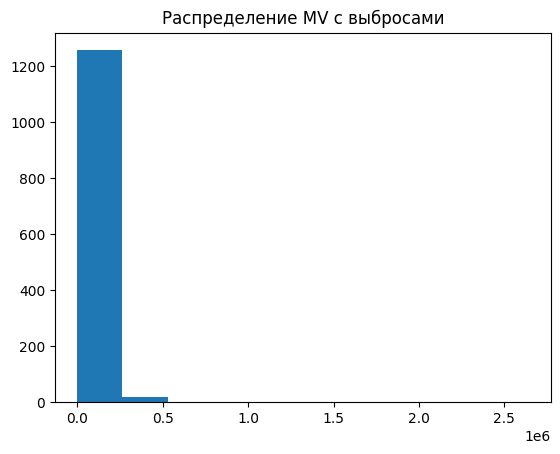

In [13]:
#посмотрим на данные и выбросы в них
plt.hist(y_train)
plt.title('Распределение MV с выбросами');

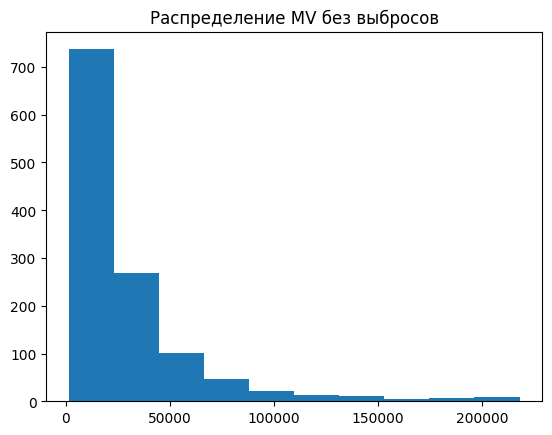

In [14]:
quantile_l = np.quantile(y_train, 0.025)
quantile_r = np.quantile(y_train, 0.975)
plt.hist(y_train[(y_train<quantile_r)&(y_train>quantile_l)])
plt.title('Распределение MV без выбросов');

Видно, что довольно много выбросов, поэтому откинем верхние и нижние квантили на уровне доверия 5%

In [15]:
data_train = data_train[(data_train.MV<quantile_r)&(data_train.MV>quantile_l)]
y_train = data_train['MV']
y_test = data_test['MV']
X_train = data_train.drop('MV', axis=1)
X_test = data_test.drop('MV', axis=1)

In [ ]:
#нормализируем данные
normalizer = StandardScaler()
normalizer.fit_transform(X_train)
normalizer.transform(X_test)

array([[-0.33514729,  0.11274568, -0.25408651, ..., -0.52859414,
         1.34645201, -0.15617376],
       [-0.58331549, -0.36088889, -0.14919598, ..., -0.52859414,
        -0.74269264, -0.15617376],
       [ 0.0253019 ,  1.57137364, -0.11843898, ..., -0.52859414,
         1.34645201, -0.15617376],
       ...,
       [-0.50462801, -0.61676192, -0.39203316, ..., -0.52859414,
         1.34645201, -0.15617376],
       [-0.55698545, -0.65716462, -0.18378482, ..., -0.52859414,
        -0.74269264, -0.15617376],
       [ 0.09672592, -0.11960214,  0.20072867, ..., -0.52859414,
        -0.74269264, -0.15617376]])

Попробоуем построить сначала простую модель линейной регрессии

In [ ]:
# Создание экземпляра модели линейной регрессии
linear_regression = LinearRegression()

# Задание параметров для перебора в GridSearchCV
params = {
    'fit_intercept': [True, False]
}

grid_search = GridSearchCV(estimator=linear_regression, param_grid=params, scoring='neg_mean_squared_error', cv = 5)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)

Best Parameters: {'fit_intercept': False}
Best MSE: 647358379.3617398
Test MSE: 1085057626.3013506


Получилась биг ошибка, попробуем другие методы

In [ ]:
# Создание экземпляра модели градиентного бустинга
gradient_boosting = GradientBoostingRegressor()

# Задание параметров для модели градиентного бустинга
params = {
    #'loss': ['log_loss', 'deviance', 'exponential'],
    'n_estimators': [100, 200, 300, 400],  # Количество деревьев
    'learning_rate': [0.1, 0.01, 0.001],  # Скорость обучения
    'max_depth': [3, 5, 7],  # Максимальная глубина деревьев
    'min_samples_split': [2, 4, 6],  # Минимальное количество образцов для разделения узла
    'min_samples_leaf': [1, 2, 3]  # Минимальное количество образцов в листовом узле
}

grid_search = GridSearchCV(estimator=gradient_boosting, param_grid=params, scoring='neg_mean_squared_error', cv = 5)

grid_search.fit(X_train, y_train)

# Вывод наилучших параметров и средней квадратичной ошибки
print("Best Parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

# Оценка на тестовом наборе
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best MSE: 527267729.37232035
Test MSE: 830011477.0730051


In [ ]:
# Создание экземпляра модели случайного леса
random_forest = RandomForestRegressor()

params = {
    'n_estimators': [100, 200, 300, 400],  # Количество деревьев
    'max_depth': [None, 5, 10],  # Максимальная глубина деревьев
    'min_samples_split': [2, 4, 6],  # Минимальное количество образцов для разделения узла
    'min_samples_leaf': [1, 2, 3]  # Минимальное количество образцов в листовом узле
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=params, scoring='neg_mean_squared_error', cv = 5)

grid_search.fit(X_train, y_train)

# Вывод наилучших параметров и средней квадратичной ошибки
print("Best Parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

# Оценка на тестовом наборе
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 300}
Best MSE: 585303697.0499463
Test MSE: 954335760.8649197


Ошибка на тесте меньше 800 миллионов у нас никак не получалась. Это ожидаемо, так как имеется очень много выбросов, и то, что мы избавились от выбросов на трейне, не сильно облегчило задачу. Мы сделали все возможное, но, к сожалению, выбросы есть, и они довольно большие, что портит всю картину). Так же ошибка может быть настолько большой, потому что в целом значения MV у нас измеряются в тысячах и больше.

